# PCアルゴリズム

確率分布によらず、全般的に使える因果推論探索手法の一つ。ただ、因果の方向を完全には決定できないことが多い。

https://chatgpt.com/c/67b08a50-130c-8006-87b1-db03a70e88a5

### 糖尿病データセット

In [38]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from pgmpy.estimators import PC

# データセットのロード
diabetes = load_diabetes()
data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
data["target"] = diabetes.target  # 目標変数を追加

# 標準化
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# データの確認
data_scaled.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.800500,1.065488,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989,-0.014719
1,-0.039567,-0.938537,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479,-1.001659
2,1.793307,1.065488,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154,-0.144580
3,-1.872441,-0.938537,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823,0.699513
4,0.113172,-0.938537,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568,-0.222496


In [52]:
def plot_graph(graph):
    plt.figure(figsize=(20, 8))
    pos = nx.spring_layout(graph, seed=42)
    nx.draw(graph, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=10)
    plt.title("PC Algorithm - Estimated Causal Structure")
    plt.show()

  0%|          | 0/5 [00:00<?, ?it/s]

推定された因果構造（無向グラフ）:


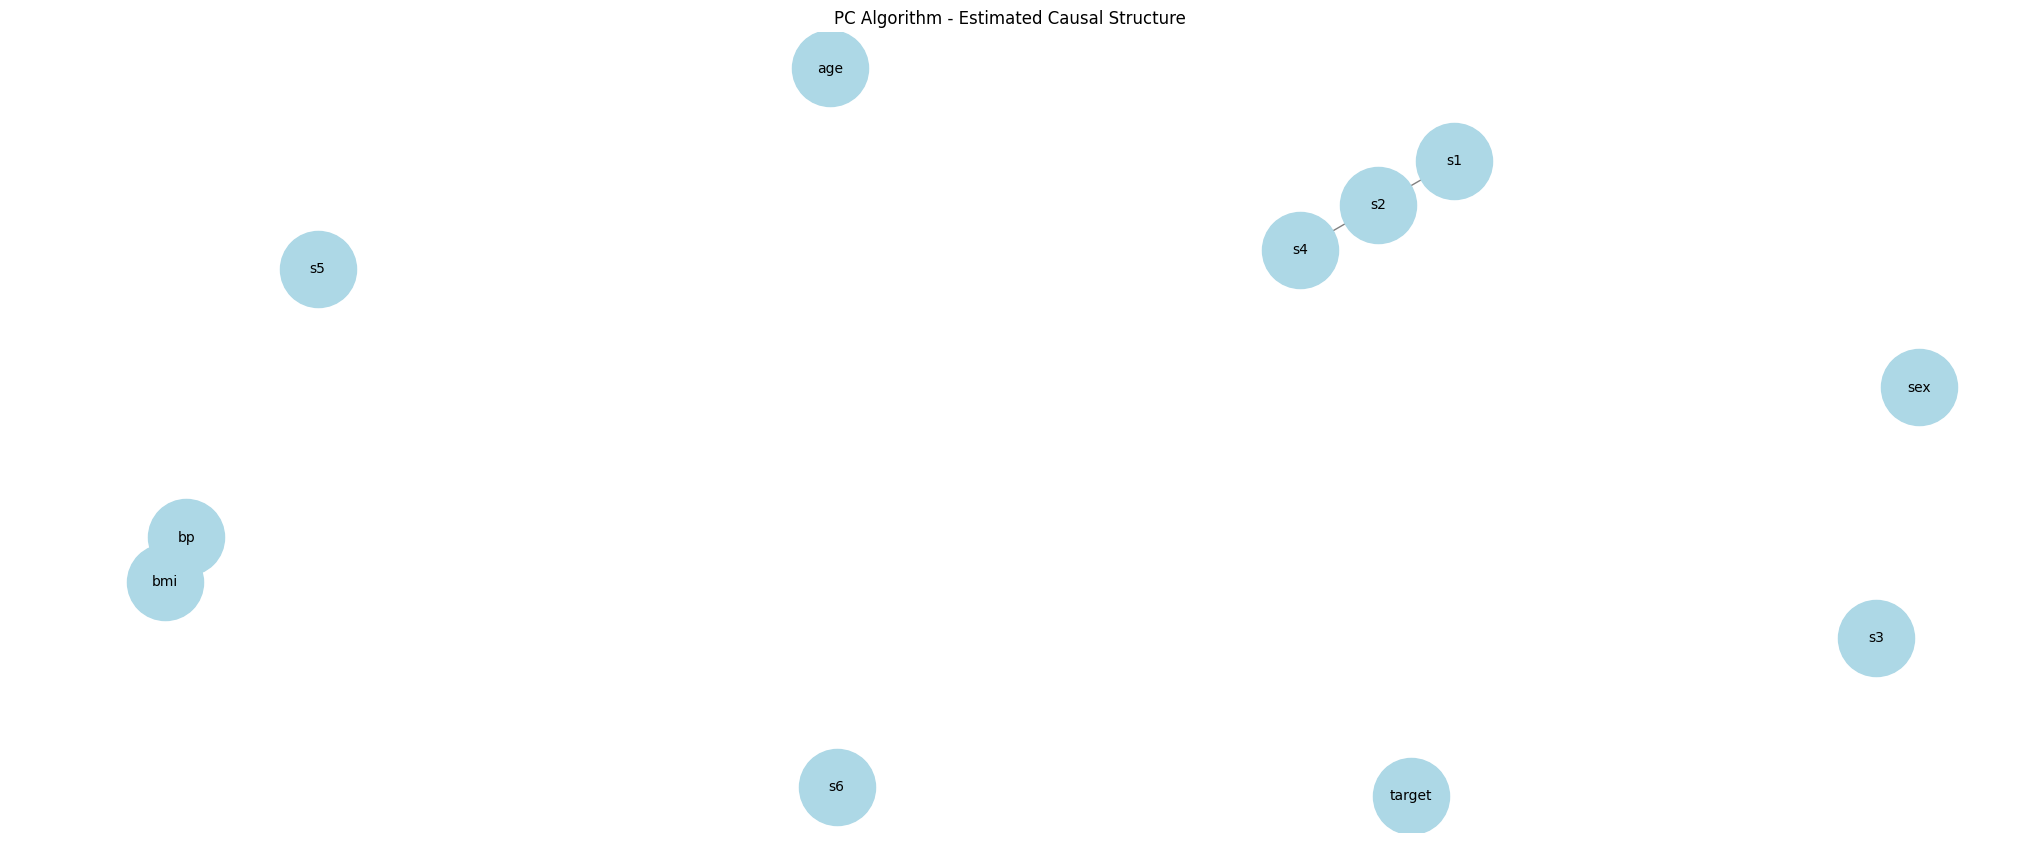

In [53]:
from pgmpy.estimators import PC

# PCアルゴリズムの適用
pc = PC(data_scaled)
skeleton, separating_sets = pc.build_skeleton(significance_level=0.05)

# 無向グラフの確認
print("推定された因果構造（無向グラフ）:")
skeleton.edges()

# 因果構造の描画
plot_graph(skeleton)

  0%|          | 0/5 [00:00<?, ?it/s]

推定された因果構造（無向グラフ）:


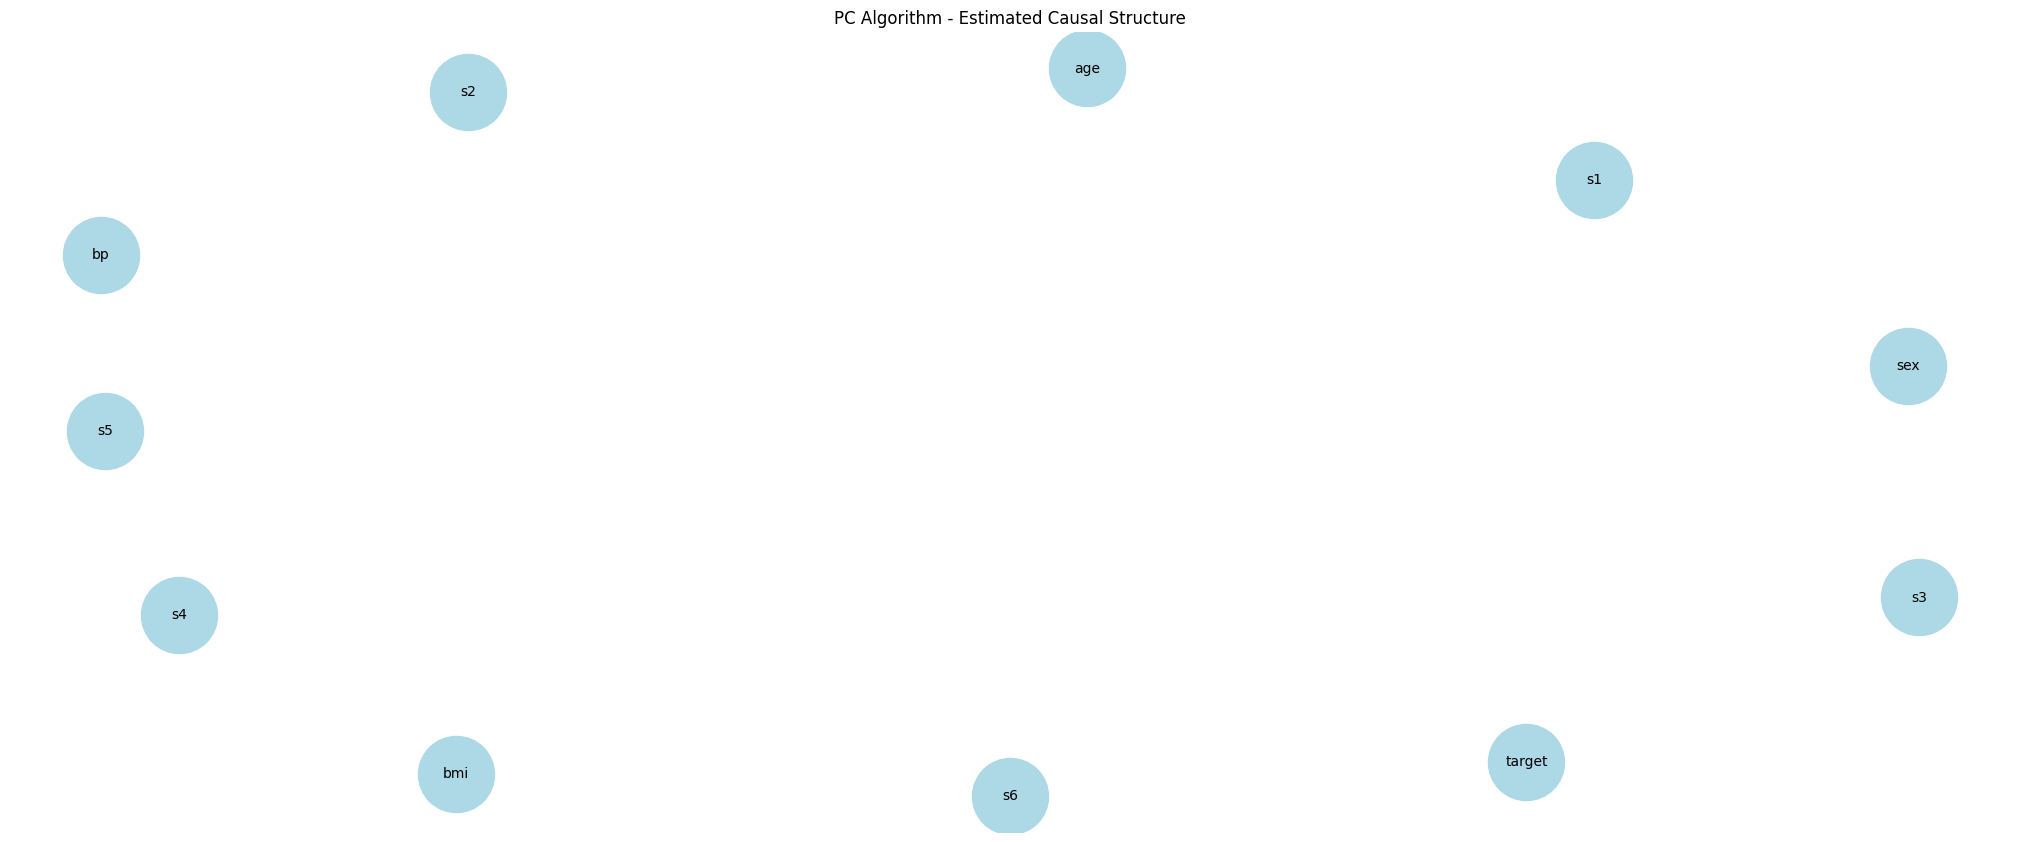

In [54]:
# PCアルゴリズムの適用
skeleton, separating_sets = pc.build_skeleton(significance_level=0.1)

# 無向グラフの確認
print("推定された因果構造（無向グラフ）:")
skeleton.edges()

# 因果構造の描画
plot_graph(skeleton)

  0%|          | 0/5 [00:00<?, ?it/s]

推定された因果構造（無向グラフ）:


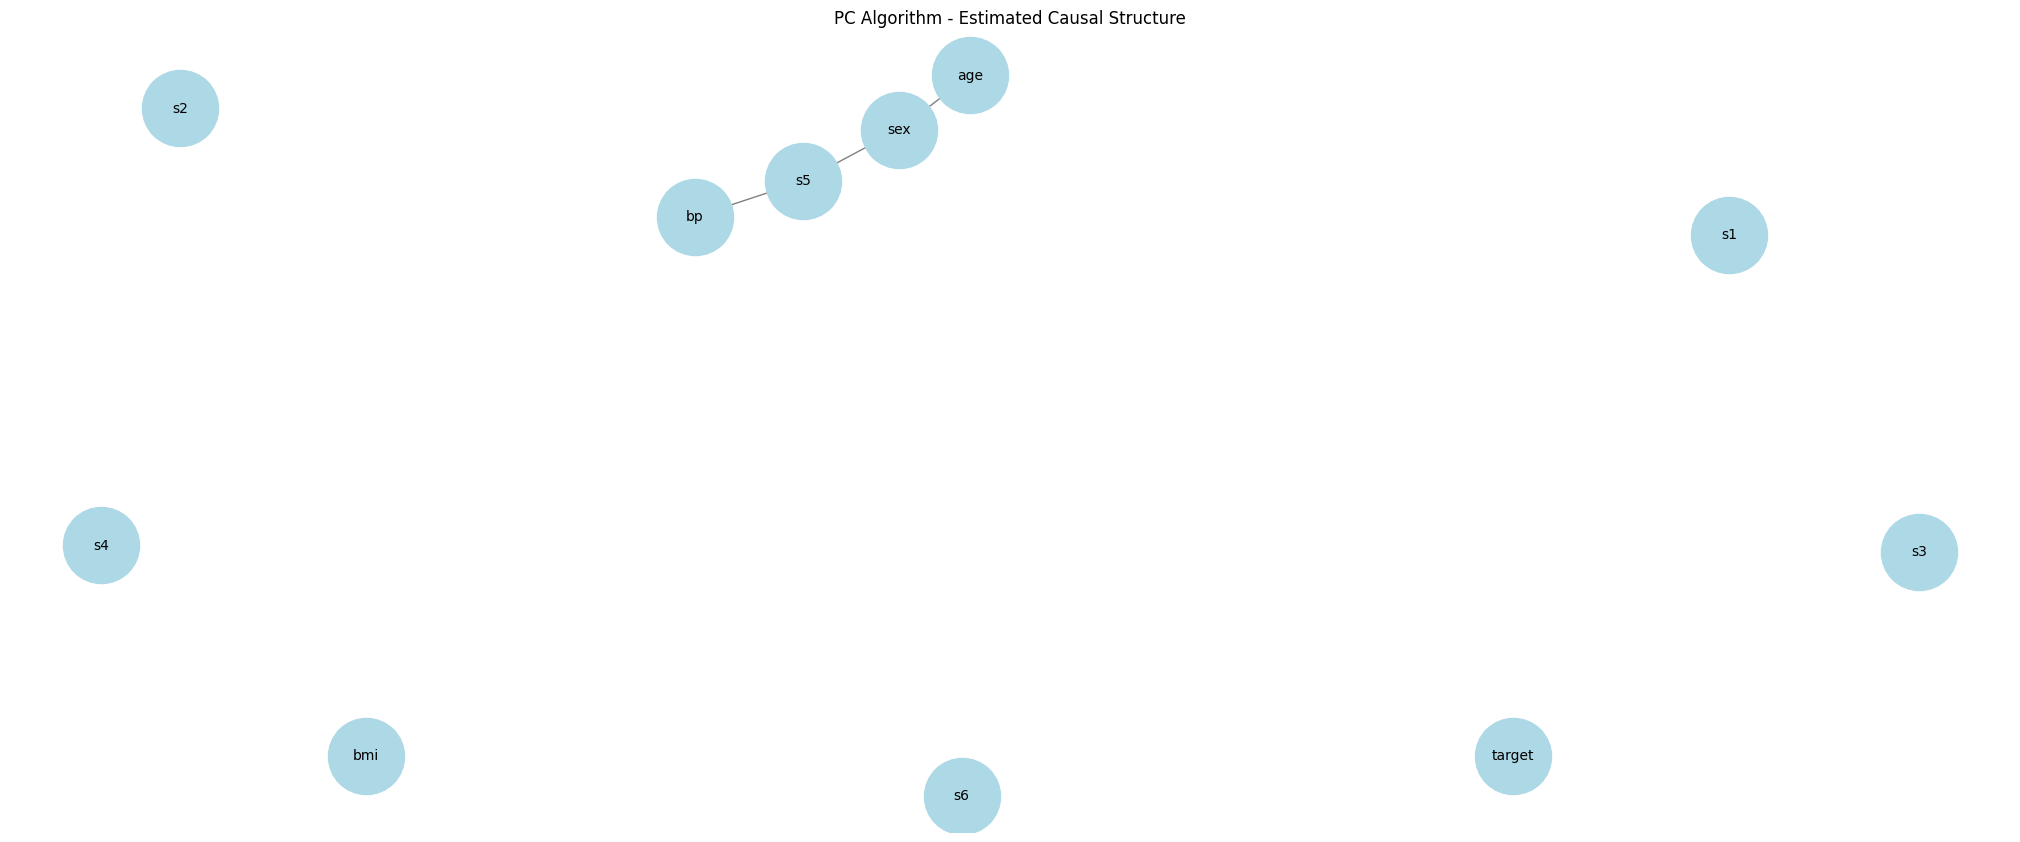

In [55]:
# PCアルゴリズムの適用
skeleton, separating_sets = pc.build_skeleton(significance_level=0.2)

# 無向グラフの確認
print("推定された因果構造（無向グラフ）:")
skeleton.edges()

# 因果構造の描画
plot_graph(skeleton)

### ワインデータセット

In [57]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from pgmpy.estimators import PC

# データのロード
wine = load_wine()
data = pd.DataFrame(wine.data, columns=wine.feature_names)
data['target'] = wine.target  # ワインの品質（クラスラベル）

# データの標準化
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# データの確認
data_scaled.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,-1.213944
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,-1.213944
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,-1.213944
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,-1.213944
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,-1.213944


In [64]:
def plot_graph(graph):
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(graph, seed=42)
    nx.draw(graph, pos, with_labels=True, node_color='lightgreen', edge_color='gray', node_size=300, font_size=10)
    plt.title("PC Algorithm - Estimated Causal Structure")
    plt.show()

  0%|          | 0/5 [00:00<?, ?it/s]

推定された因果構造（無向グラフ）:
[('color_intensity', 'proline')]


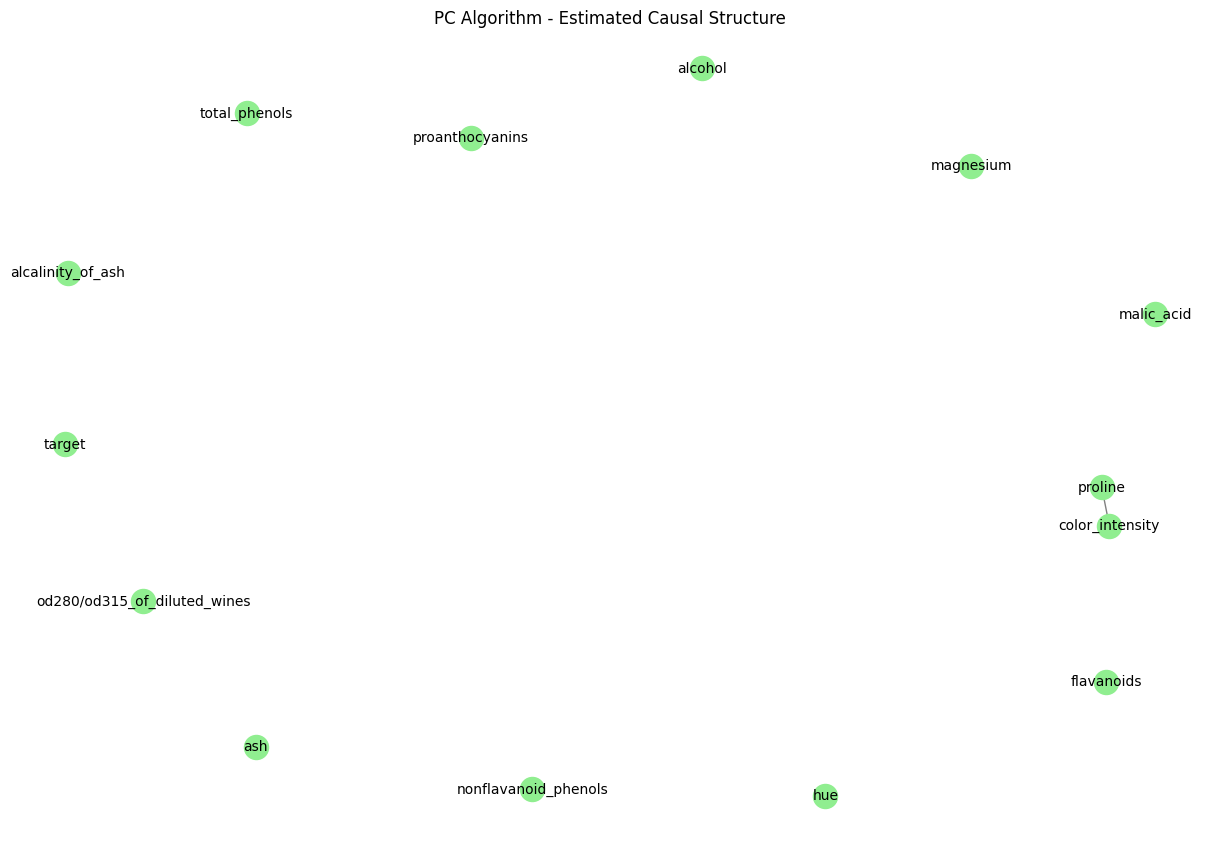

In [65]:
# PCアルゴリズムを適用
pc = PC(data_scaled)
skeleton, separating_sets = pc.build_skeleton(significance_level=0.05)

# 推定された因果構造を確認
print("推定された因果構造（無向グラフ）:")
print(skeleton.edges())

# グラフを描画
plot_graph(skeleton)

  0%|          | 0/5 [00:00<?, ?it/s]

推定された因果構造（無向グラフ）:
[]


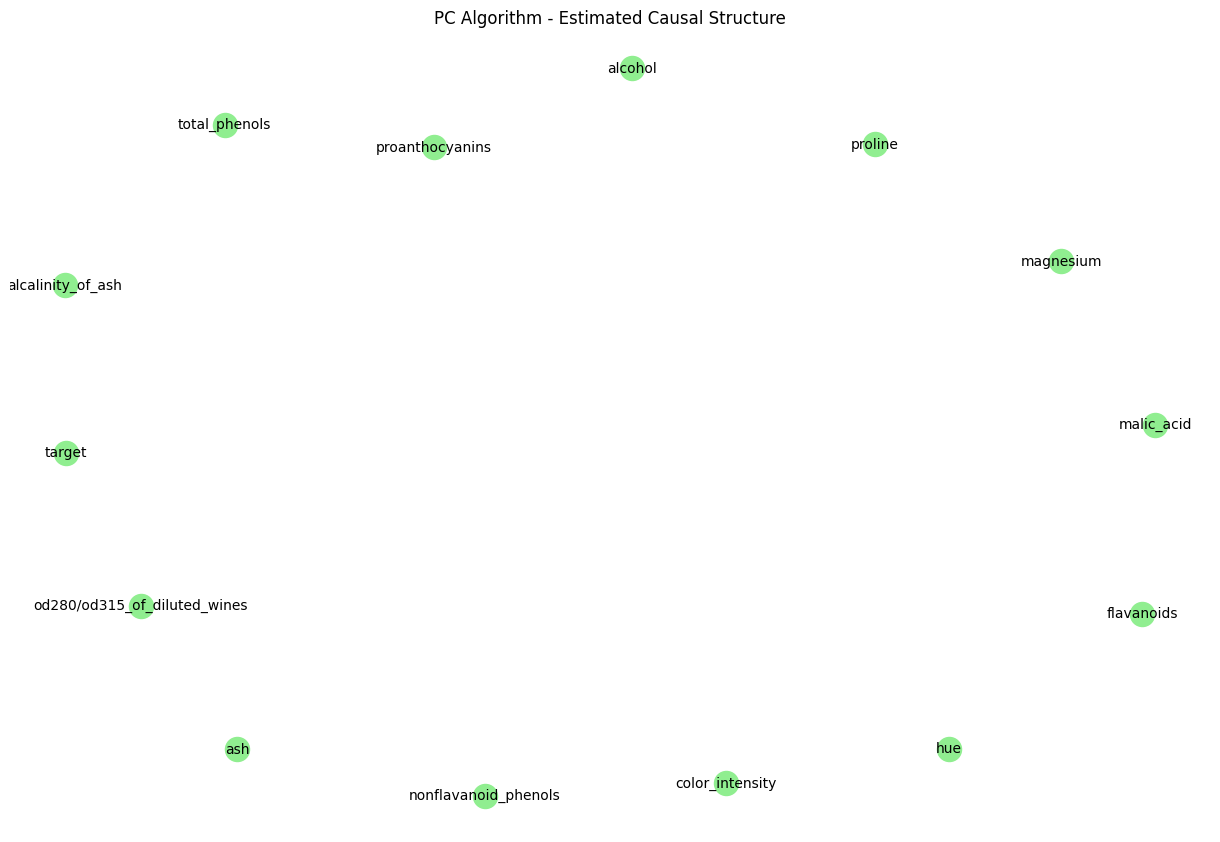

In [66]:
skeleton, separating_sets = pc.build_skeleton(significance_level=0.1)

# 推定された因果構造を確認
print("推定された因果構造（無向グラフ）:")
print(skeleton.edges())

# グラフを描画
plot_graph(skeleton)

  0%|          | 0/5 [00:00<?, ?it/s]

推定された因果構造（無向グラフ）:
[('alcohol', 'malic_acid')]


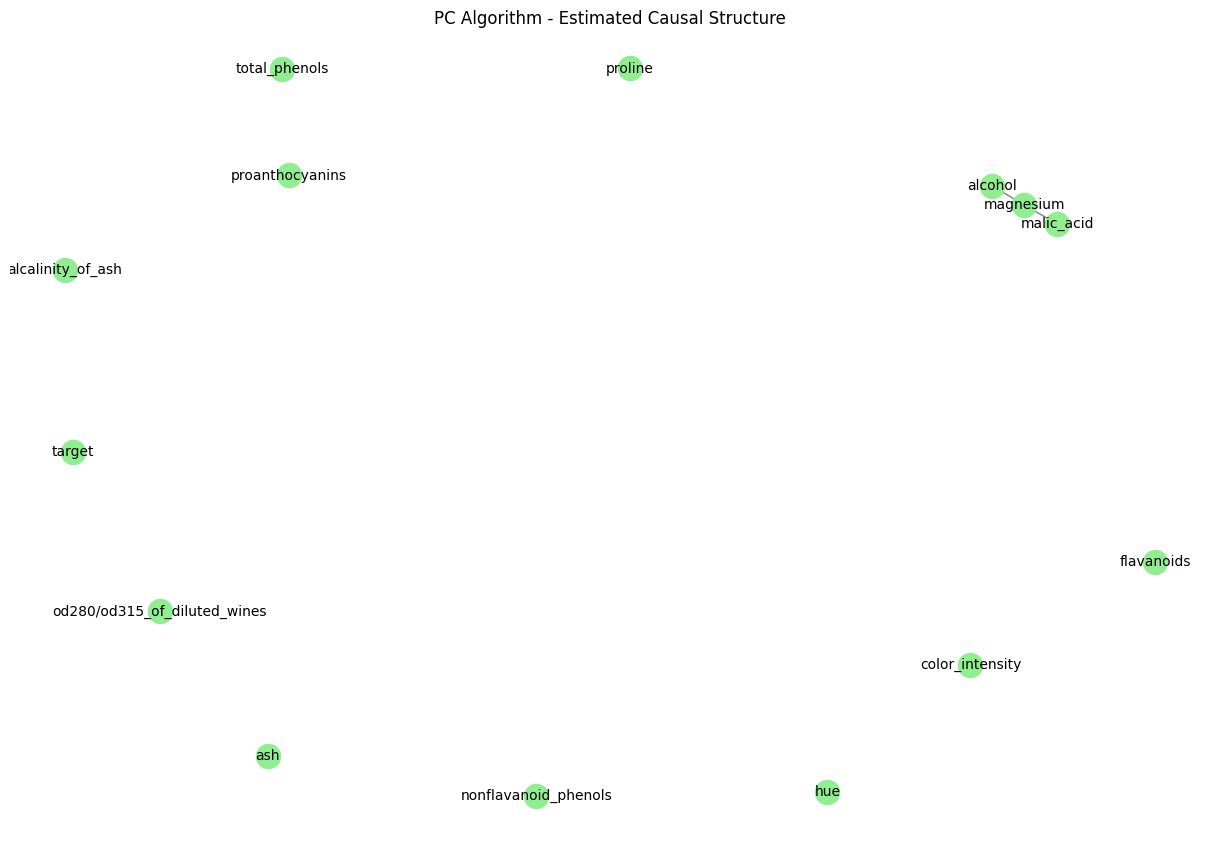

In [67]:
skeleton, separating_sets = pc.build_skeleton(significance_level=0.2)

# 推定された因果構造を確認
print("推定された因果構造（無向グラフ）:")
print(skeleton.edges())

# グラフを描画
plot_graph(skeleton)